<center>Заметка 1. 	Анализ зависимостей.</center>
<center>курса <q>Прикладной статистический анализ данных</q>.</center>
<center>Версия 1</center>

# Успеваемость первокурсников

Для 600 первокурсников известны показатели успеваемости по четырём предметам и результаты трёх психологических тестов. 

Как связаны эти два набора переменных?

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, kendalltau

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [3]:
df = pd.read_csv('mmreg.csv', sep = ',')
df.head()

,locus_of_control,self_concept,motivation,read,write,math,science
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3


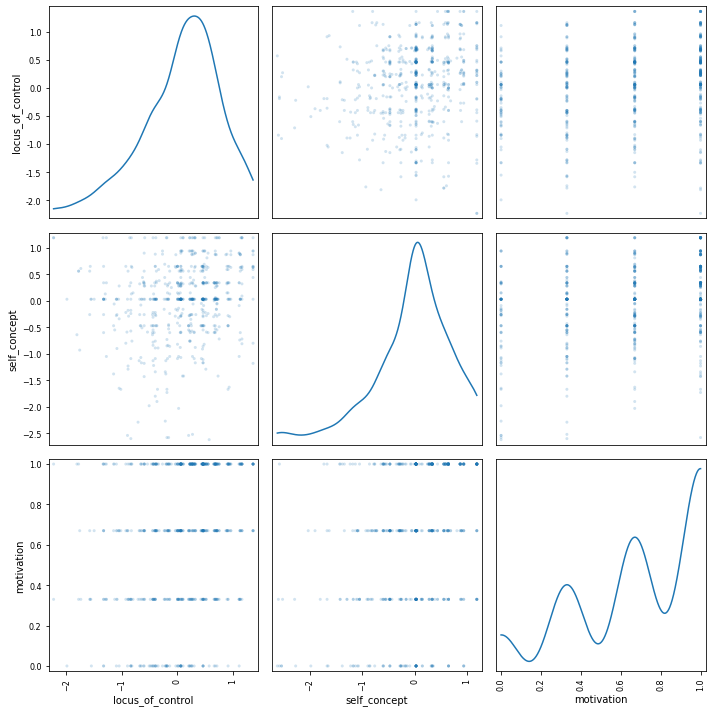

In [4]:
psych = df.iloc[:,0:3]
pd.plotting.scatter_matrix(psych, alpha=0.2, figsize = (10,10), diagonal='kde')
plt.tight_layout()
plt.savefig('scatter_matrix.png')

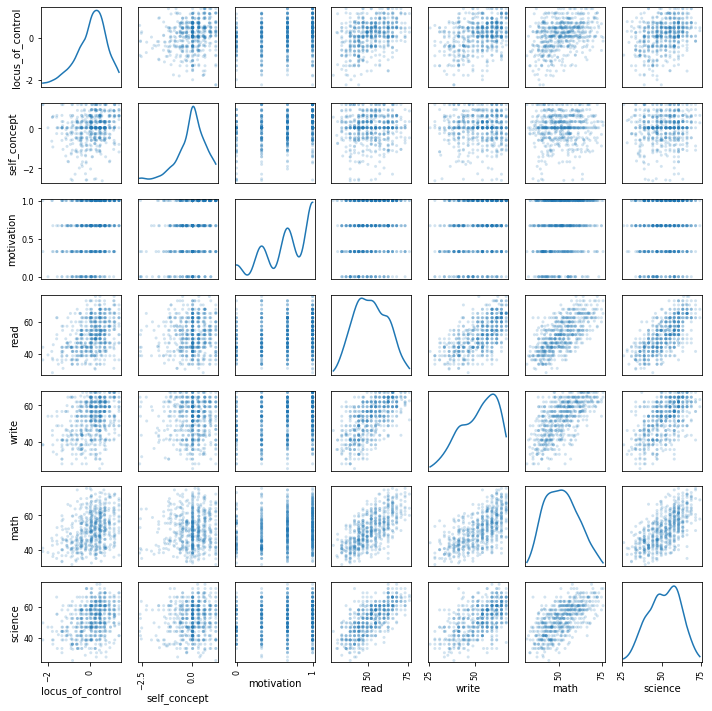

In [5]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (10,10), diagonal='kde')
plt.tight_layout()

Визуализируйте попарные корреляции Пирсона с помощью функции `heatmap` из пакета `seaborn`,
предварительно посчитав их с помощью функции `corr` из пакета `pandas`.  Воспользуйтесь функцией `pearsonr` из `scipy.stats` для подсчета p-value.

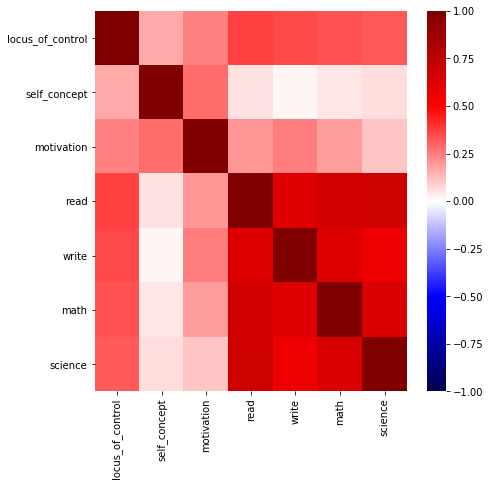

In [6]:


plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(method='pearson'), annot=True,
            vmin=-1, vmax=1, center=0, square=True,
            cmap="coolwarm", linewidths=1, cbar_kws={"shrink": .5})
plt.show()

In [7]:
from scipy import stats

p_val_Pmatrix = pd.DataFrame(np.zeros([df.shape[1],df.shape[1]]), columns = df.columns, index = df.columns)
for i in df.columns: 
    for j in df.columns:
        p_val_Pmatrix[i][j] = round(pearsonr(df[i], df[j])[1], 4)
p_val_Pmatrix

,locus_of_control,self_concept,motivation,read,write,math,science
locus_of_control,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
self_concept,0.0,0.0000,0.0000,0.1378,0.6345,0.1898,0.0875
motivation,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0046
read,0.0,0.1378,0.0000,0.0000,0.0000,0.0000,0.0000
write,0.0,0.6345,0.0000,0.0000,0.0000,0.0000,0.0000
math,0.0,0.1898,0.0000,0.0000,0.0000,0.0000,0.0000
science,0.0,0.0875,0.0046,0.0000,0.0000,0.0000,0.0000


Визуализируйте попарные корреляции Спирмена с помощью функции `heatmap` из пакета `seaborn`, предварительно посчитав их с помощью функции функции `corr` из пакета `pandas`. Воспользуйтесь функцией `spearmanr` из `scipy.stats` для подсчета p-value.

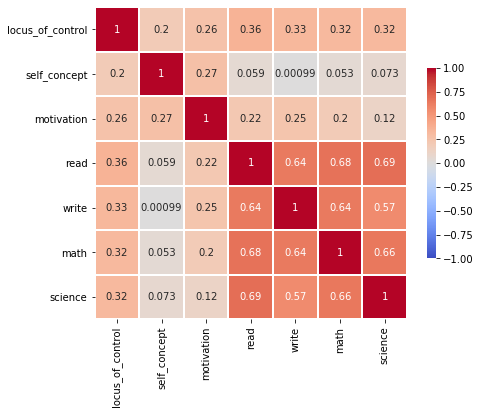

In [8]:
plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(method='spearman'), annot=True,
            vmin=-1, vmax=1, center=0, square=True,
            cmap="coolwarm", linewidths=1, cbar_kws={"shrink": .5})
plt.show()

In [9]:
from scipy import stats

p_val_Pmatrix = pd.DataFrame(np.zeros([df.shape[1],df.shape[1]]), columns = df.columns, index = df.columns)
for i in df.columns: 
    for j in df.columns:
        p_val_Pmatrix[i][j] = round(spearmanr(df[i], df[j])[1], 4)
p_val_Pmatrix

,locus_of_control,self_concept,motivation,read,write,math,science
locus_of_control,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
self_concept,0.0,0.0000,0.0000,0.1492,0.9807,0.1952,0.0758
motivation,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0022
read,0.0,0.1492,0.0000,0.0000,0.0000,0.0000,0.0000
write,0.0,0.9807,0.0000,0.0000,0.0000,0.0000,0.0000
math,0.0,0.1952,0.0000,0.0000,0.0000,0.0000,0.0000
science,0.0,0.0758,0.0022,0.0000,0.0000,0.0000,0.0000


Визуализируйте попарные корреляции Кендалла с помощью функции `heatmap` из пакета `seaborn`, предварительно посчитав их с помощью функции функции `corr` из пакета `pandas`. Воспользуйтесь функцией `kendalltau` из `scipy.stats` для подсчета p-value.

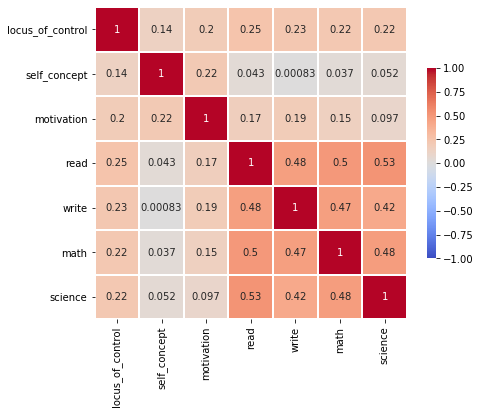

In [10]:
import seaborn as sns

plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(method='kendall'), annot=True,
            vmin=-1, vmax=1, center=0, square=True,
            cmap="coolwarm", linewidths=1, cbar_kws={"shrink": .5})
plt.show()

In [11]:
from scipy import stats

p_val_Pmatrix = pd.DataFrame(np.zeros([df.shape[1],df.shape[1]]), columns = df.columns, index = df.columns)
for i in df.columns: 
    for j in df.columns:
        p_val_Pmatrix[i][j] = round(kendalltau(df[i], df[j])[1], 4)
p_val_Pmatrix

,locus_of_control,self_concept,motivation,read,write,math,science
locus_of_control,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
self_concept,0.0,0.0000,0.0000,0.138,0.977,0.1935,0.0729
motivation,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0023
read,0.0,0.1380,0.0000,0.000,0.000,0.0000,0.0000
write,0.0,0.9770,0.0000,0.000,0.000,0.0000,0.0000
math,0.0,0.1935,0.0000,0.000,0.000,0.0000,0.0000
science,0.0,0.0729,0.0023,0.000,0.000,0.0000,0.0000


Если вам не нужна полноценная матрица всевозможных корреляций, а нужна только попарная корреляция некоторых групп, гораздо удобнее воспользоваться стандартной функцией `pairplot` из `seaborn`. Примените функцию `pairplot` для любой из пар признаков, для которых `scipy.stats` выдает нулевое p-value. 

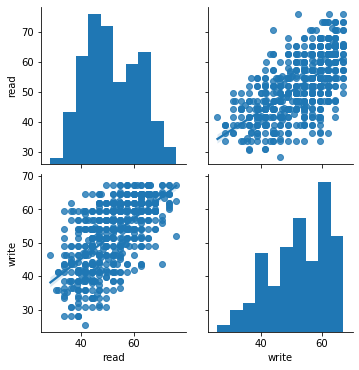

In [12]:
sns.pairplot(df[['read','write']], kind='reg')
plt.show()

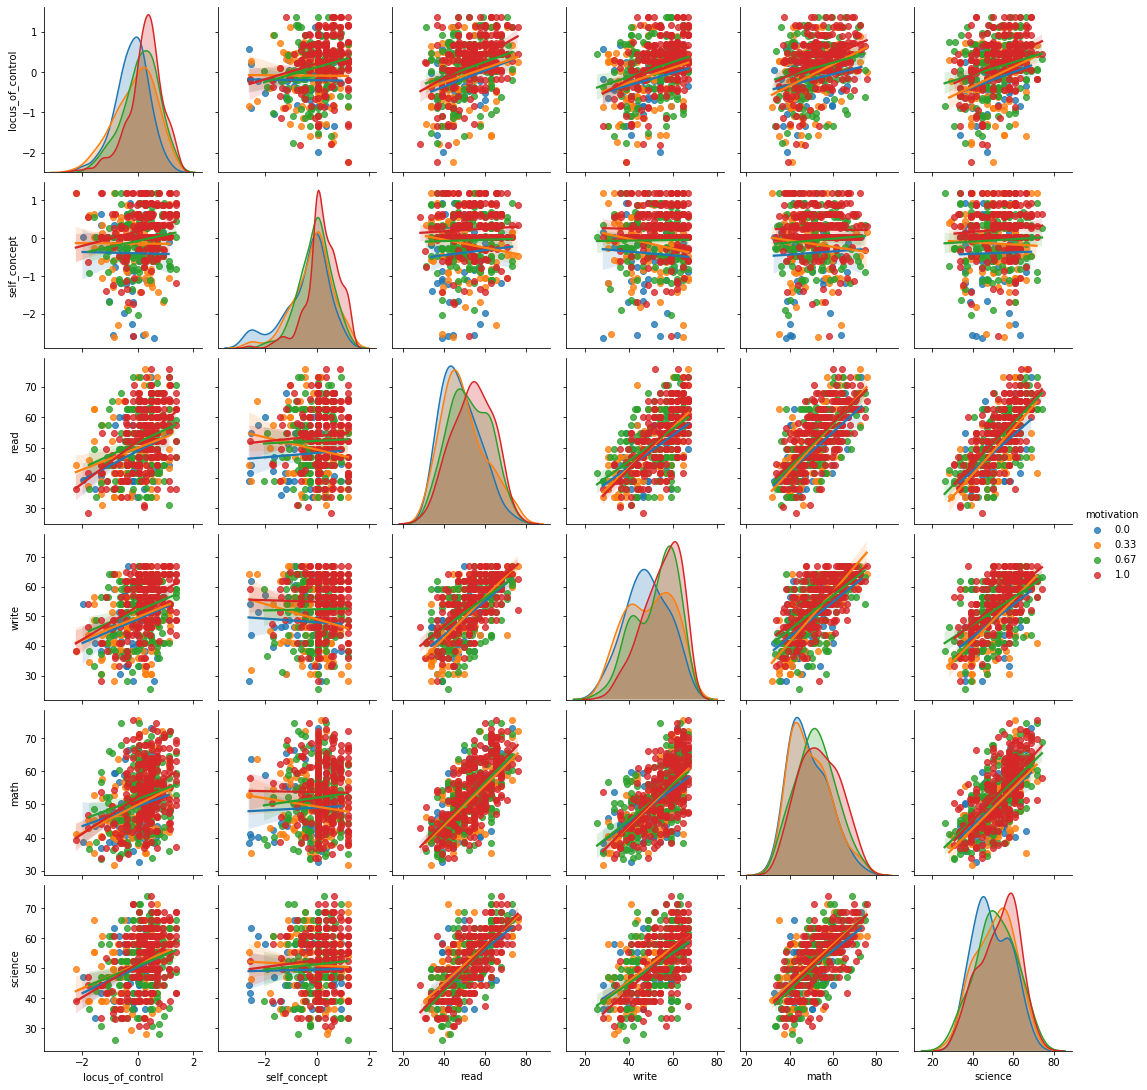

In [13]:
sns.pairplot(df, hue="motivation", kind='reg')
plt.show()

# Частная корреляция

С помощью функции `pcorr`  из пакета `pingouin`  получите значения частных корреляций попарно между всеми переменными (при условии всех остальных) и сравните получившуюся матрицу с обычными попарными корреляциями, которые вы получили ранее. 

In [7]:
import pingouin as pg
df.pcorr()

,locus_of_control,self_concept,motivation,read,write,math,science
locus_of_control,1.000000,0.122694,0.123289,0.111679,0.116814,0.044980,0.051523
self_concept,0.122694,1.000000,0.275615,-0.015310,-0.099517,-0.002342,0.062859
motivation,0.123289,0.275615,1.000000,0.066216,0.156679,0.032581,-0.113943
read,0.111679,-0.015310,0.066216,1.000000,0.231949,0.291570,0.386439
write,0.116814,-0.099517,0.156679,0.231949,1.000000,0.286578,0.144025
math,0.044980,-0.002342,0.032581,0.291570,0.286578,1.000000,0.278262
science,0.051523,0.062859,-0.113943,0.386439,0.144025,0.278262,1.000000


Кроме частной корреляции есть еще так называемая получастная (semi partial correlation).
На практике такая корреляция используется редко, но концептуально это та же самая корреляция, только теперь вместо одного  (и только одного) из признаков рассматриваются отстаки от регрессии этого признака на какой-то другой признак (по которому мы берем условие). Подобные извращения также доступны для функции `partial_corr` с помощью настройки `x_covar`, `y_covar`. 

In [15]:
pg.partial_corr(data=df, x='self_concept', y='math', method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,600,0.054,"[-0.03, 0.13]",0.003,-0.0,0.189832,0.121,0.259


In [16]:
pg.partial_corr(data=df, x='self_concept', y='math', x_covar='locus_of_control', y_covar=['read', 'write'], method='pearson')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,600,0.017,"[-0.06, 0.1]",0.0,-0.003,0.672268,0.056,0.071


In [17]:
pg.partial_corr(data=df, x='self_concept', y='math', x_covar='locus_of_control', y_covar=['read', 'write'], method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,600,0.012,"[-0.07, 0.09]",0.0,-0.003,0.759963,0.061


In [18]:
pg.partial_corr(data=df, x='self_concept', y='math', x_covar='locus_of_control', y_covar=['read', 'write'], method='kendall')

,n,r,CI95%,r2,adj_r2,p-val,power
kendall,600,0.009,"[-0.07, 0.09]",0.0,-0.003,0.754474,0.055


## Коэффициент Лина (Concordance correlation coefficient)

Реализуйте функцию, вычисляющую коэффициент Лина, и примените её к любой из пар признаков. Целесообразно ли использование коэффициента Лина?

In [19]:
def correct_lin_ccc(X, Y):
    numerator = np.square(X - Y).mean()
    denominator = np.square(X[:, np.newaxis] - Y[np.newaxis, :]).mean()
    return 1 - numerator / denominator

def lin_ccc(X, Y):
    """Calculate Lin's concordance correlation coefficient
    """
    X_mean = X.mean()
    Y_mean = Y.mean()
    XY_mean = (X * Y).mean()
    X_var = np.var(X)
    Y_var = np.var(Y)
    denominator = np.square(X_mean - Y_mean) + X_var + Y_var
    numerator = denominator - 2 * (XY_mean - X_mean * Y_mean)
    return 1 - numerator / denominator

lin_ccc(df['read'], df['write'])

0.6273923293229913

Применение коэффициента Лина целесообразно при сравнении выборок из близких распределений, например колонок `read`, `write`, `math`, `science`.